# 데이터 가져오기

In [1]:
import pandas as pd

In [2]:
pd.read_csv('./data/original/sample_submission.csv').head()

,일자,중식계,석식계
0,2021-01-27,0,0
1,2021-01-28,0,0
2,2021-01-29,0,0
3,2021-02-01,0,0
4,2021-02-02,0,0


In [3]:
train = pd.read_csv('./data/original/train.csv',parse_dates=['일자'])
test = pd.read_csv('./data/original/test.csv',parse_dates=['일자'])
print('train.shape : ',train.shape)
print('test.shape  : ',test.shape)

train.shape :  (1205, 12)
test.shape  :  (50, 10)


In [4]:
train.head(2)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0


In [5]:
train.isnull().sum()

일자                0
요일                0
본사정원수             0
본사휴가자수            0
본사출장자수            0
본사시간외근무명령서승인건수    0
현본사소속재택근무자수       0
조식메뉴              0
중식메뉴              0
석식메뉴              0
중식계               0
석식계               0
dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              1205 non-null   datetime64[ns]
 1   요일              1205 non-null   object        
 2   본사정원수           1205 non-null   int64         
 3   본사휴가자수          1205 non-null   int64         
 4   본사출장자수          1205 non-null   int64         
 5   본사시간외근무명령서승인건수  1205 non-null   int64         
 6   현본사소속재택근무자수     1205 non-null   float64       
 7   조식메뉴            1205 non-null   object        
 8   중식메뉴            1205 non-null   object        
 9   석식메뉴            1205 non-null   object        
 10  중식계             1205 non-null   float64       
 11  석식계             1205 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 113.1+ KB


In [7]:
train.describe().round(2)

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
count,1205.00,1205.00,1205.00,1205.00,1205.00,1205.00,1205.00
mean,2807.82,157.91,241.14,274.12,43.51,890.33,461.77
std,171.26,144.19,43.53,246.24,109.94,209.51,139.18
min,2601.00,23.00,41.00,0.00,0.00,296.00,0.00
25%,2645.00,71.00,217.00,4.00,0.00,758.00,406.00
50%,2760.00,105.00,245.00,299.00,0.00,879.00,483.00
75%,2962.00,185.00,272.00,452.00,0.00,1032.00,545.00
max,3305.00,1224.00,378.00,1044.00,533.00,1459.00,905.00


# 1. 데이터 전처리

## 1.1 칼럼명 변경

In [8]:
print(train.columns)
print(test.columns)

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계'],
      dtype='object')
Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴'],
      dtype='object')


In [9]:
train.columns = ['ymd', 'dow', 'employees', 'dayoff', 'bustrip', 'overtime',
                 'remote', 'menu1', 'menu2', 'menu3', 'ln', 'dn']
test.columns = ['ymd', 'dow', 'employees', 'dayoff', 'bustrip', 'overtime',
                'remote', 'menu1', 'menu2', 'menu3']

In [10]:
train = train.drop('menu1', axis=1)
test = test.drop('menu1', axis=1)

In [11]:
train_raw = train.copy()
test_raw = test.copy()

## 1.2 날짜 데이터

In [12]:
# 요일을 숫자 형태로 변환
# 0: 월, 1: 화, ...
train.dow = train.ymd.dt.weekday
test.dow = test.ymd.dt.weekday

## 1.3 메뉴

In [13]:
from tqdm.notebook import tqdm
import numpy as np

In [14]:
train.menu2 = train.menu2.str.replace('(New)','',regex=False)
train.menu2 = train.menu2.str.replace('( New)','',regex=False)
train.menu3 = train.menu3.str.replace('(New)','',regex=False)
test.menu2 = test.menu2.str.replace('(New)','',regex=False)
test.menu3 = test.menu3.str.replace('(New)','',regex=False)

In [15]:
def menulist(df_menu):
    tmp = df_menu.str.split()
    tmp_menu = []
    for menu in tmp:
        for m in menu:
            if '(' in m:
                menu.remove(m)
        tmp_menu.append(menu)
    return tmp_menu

In [16]:
train.menu2[1142] = train.menu2[1142].replace('쌀밥/ ','쌀밥/')

<ipython-input-16-b8e57dc6fca5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.menu2[1142] = train.menu2[1142].replace('쌀밥/ ','쌀밥/')


In [17]:
# train 점심메뉴
train.menu2 = train.menu2.str.replace('\<\S+\>|\*\S+|\&\S+','',regex=True)
train_menu2 = menulist(train.menu2)
train_menu2[1065:1070]

[['쌀밥/잡곡밥', '매운소고기국', '굴비구이', '토마토프리타타', '도라지오이무침', '배추겉절이'],
 ['돈육버섯고추장덮밥', '팽이무국', '양파링카레튀김', '모듬어묵볶음', '참나물생채', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '냉모밀국수', '매운돈갈비찜', '메밀전병', '고구마순볶음', '포기김치', '양상추샐러드'],
 ['쌀밥/잡곡밥', '대파육개장', '홍어미나리초무침', '어묵잡채', '콩자반', '배추겉절이', '양상추샐러드'],
 ['카레라이스', '동태알탕', '부추고추전', '쫄면야채무침', '과일요거트샐러드', '포기김치', '요구르트']]

In [18]:
rice = [];soup=[];side1=[];side2=[];side3=[];kimchi=[];etc=[]
for i,menu in enumerate(train_menu2):
    rice.append(menu[0])
    soup.append(menu[1])
    side1.append(menu[2]);side2.append(menu[3]);side3.append(menu[4])
    
    if i < 1067:
        kimchi.append(menu[-1])
        etc.append(menu[-2])
    else:
        kimchi.append(menu[-2])
        etc.append(menu[-1])

In [19]:
train_ln = train[['ymd','dow','employees','dayoff','bustrip','overtime','remote','menu2', 'ln']].copy()
train_ln['rice'] = rice
train_ln['soup'] = soup
train_ln['side1'] = side1;train_ln['side2'] = side2;train_ln['side3'] = side3
train_ln['kimchi'] = kimchi
train_ln['etc'] = etc

In [20]:
train_ln.head(3)

,ymd,dow,employees,dayoff,bustrip,overtime,remote,menu2,ln,rice,soup,side1,side2,side3,kimchi,etc
0,2016-02-01,0,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...",1039.0,쌀밥/잡곡밥,오징어찌개,쇠불고기,계란찜,청포묵무침,포기김치,요구르트
1,2016-02-02,1,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...",867.0,쌀밥/잡곡밥,김치찌개,가자미튀김,모둠소세지구이,마늘쫑무침,배추겉절이,요구르트
2,2016-02-03,2,2601,56,180,111,0.0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...",1017.0,카레덮밥,팽이장국,치킨핑거,쫄면야채무침,견과류조림,포기김치,요구르트


In [21]:
train.menu3 = train.menu3.str.replace('\*\S+|\&\S+','',regex=True)
train.menu3 = train.menu3.str.replace('\(김밥재료\)|\(작은밥\)','',regex=True)
train_menu3 = menulist(train.menu3)
train_menu3[0]

['쌀밥/잡곡밥', '육개장', '자반고등어구이', '두부조림', '건파래무침', '포기김치']

In [22]:
# train 저녁메뉴
rice = [];soup=[];side1=[];side2=[];side3=[];kimchi=[]
for i,menu in tqdm(enumerate(train_menu3)):
    if len(menu) > 3:
        rice.append(menu[0])
        soup.append(menu[1])
        side1.append(menu[2]);side2.append(menu[3]);side3.append(menu[4])
        kimchi.append(menu[-1])
    else:
        rice.append(np.nan)
        soup.append(np.nan)
        side1.append(np.nan);side2.append(np.nan);side3.append(np.nan)
        kimchi.append(np.nan)
    
train_dn = train[['ymd','dow','employees','dayoff','bustrip','overtime','remote','menu3', 'dn']].copy()
train_dn['rice'] = rice
train_dn['soup'] = soup
train_dn['side1'] = side1;train_dn['side2'] = side2;train_dn['side3'] = side3
train_dn['kimchi'] = kimchi

0it [00:00, ?it/s]

In [23]:
train_dn.loc[train_dn.rice.str.contains('국내산',na=False)]

,ymd,dow,employees,dayoff,bustrip,overtime,remote,menu3,dn,rice,soup,side1,side2,side3,kimchi


In [24]:
menulist(test.menu2)[0]

['쌀밥/흑미밥/찰현미밥', '대구지리', '매운돈갈비찜', '오꼬노미계란말이', '상추무침', '포기김치', '양상추샐러드*딸기D']

In [25]:
# test 점심메뉴
test.menu2 = test.menu2.str.replace('\*\S+|\&\S+','',regex=True)
test_menu2 = menulist(test.menu2)

rice = [];soup=[];side1=[];side2=[];side3=[];kimchi=[];etc=[]
for i,menu in tqdm(enumerate(test_menu2)):
    if len(menu) > 3:
        rice.append(menu[0])
        soup.append(menu[1])
        side1.append(menu[2]);side2.append(menu[3]);side3.append(menu[4])
        kimchi.append(menu[-2])
        etc.append(menu[-1])
    else:
        rice.append(np.nan)
        soup.append(np.nan)
        side1.append(np.nan);side2.append(np.nan);side3.append(np.nan)
        kimchi.append(np.nan)
        etc.append(np.nan)
    
test_ln = test[['ymd','dow','employees','dayoff','bustrip','overtime','remote','menu2']].copy()
test_ln['rice'] = rice
test_ln['soup'] = soup
test_ln['side1'] = side1;test_ln['side2'] = side2;test_ln['side3'] = side3
test_ln['kimchi'] = kimchi
test_ln['etc'] = etc

0it [00:00, ?it/s]

In [26]:
menulist(test.menu3)[0]

['흑미밥', '얼큰순두부찌개', '쇠고기우엉볶음', '버섯햄볶음', '아삭이고추무절임', '포기김치']

In [27]:
# test 저녁메뉴
test.menu3 = test.menu3.str.replace('\*\S+|\&\S+','',regex=True)
test_menu3 = menulist(test.menu3)

rice = [];soup=[];side1=[];side2=[];side3=[];kimchi=[]
for i,menu in tqdm(enumerate(test_menu3)):
    if len(menu) > 3:
        rice.append(menu[0])
        soup.append(menu[1])
        side1.append(menu[2]);side2.append(menu[3]);side3.append(menu[4])
        kimchi.append(menu[-2])
    else:
        rice.append(np.nan)
        soup.append(np.nan)
        side1.append(np.nan);side2.append(np.nan);side3.append(np.nan)
        kimchi.append(np.nan)
    
test_dn = test[['ymd','dow','employees','dayoff','bustrip','overtime','remote','menu3']].copy()
test_dn['rice'] = rice
test_dn['soup'] = soup
test_dn['side1'] = side1;test_dn['side2'] = side2;test_dn['side3'] = side3
test_dn['kimchi'] = kimchi

0it [00:00, ?it/s]

# 2. 시각화

In [28]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='NanumGothic')
matplotlib.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')

## 2.1 점심 저녁 식수 추이

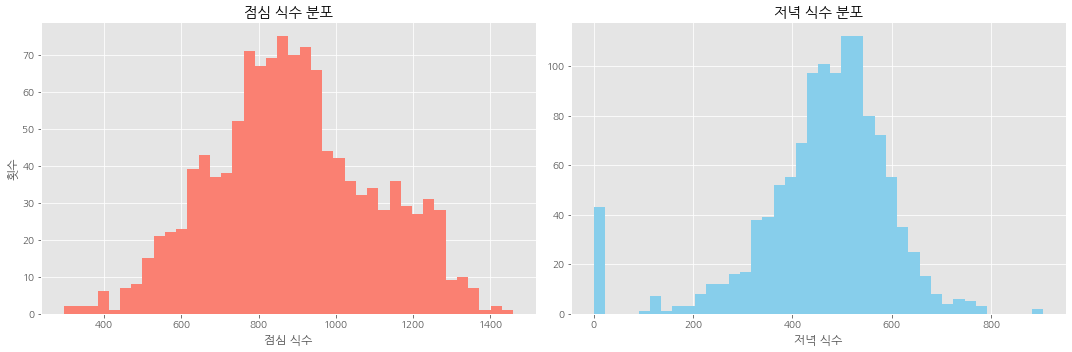

In [29]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.hist(train.ln,bins=40,color='salmon')
plt.xlabel('점심 식수')
plt.ylabel('횟수')
plt.title('점심 식수 분포')

plt.subplot(122)
plt.hist(train.dn,bins=40,color='skyblue')
plt.xlabel('저녁 식수')
plt.title('저녁 식수 분포')

plt.tight_layout()
plt.show()

In [30]:
train.loc[train.dn==0]

,ymd,dow,employees,dayoff,bustrip,overtime,remote,menu2,menu3,ln,dn
204,2016-11-30,2,2689,68,207,0,0.0,나물비빔밥 (쌀:국내산) 가쯔오장국 치킨핑거 감자샐러드 오복지무침 포기김치 ...,*,1109.0,0.0
224,2016-12-28,2,2705,166,225,0,0.0,콩나물밥 (쌀:국내산) 가쯔오장국 미트볼케찹조림 꽃맛살샐러드 군고구마 배추겉...,*,767.0,0.0
244,2017-01-25,2,2697,79,203,0,0.0,카레덮밥 (쌀:국내산) 맑은국 유린기 개성감자만두 오이사과무침 포기김치 (김...,*,720.0,0.0
262,2017-02-22,2,2632,75,252,0,0.0,나물비빔밥 (쌀:국내산) 유부장국 생선까스 파스타샐러드 마늘쫑볶음 알타리김치...,*,1065.0,0.0
281,2017-03-22,2,2627,53,235,0,0.0,쌀밥/잡곡밥 (쌀:국내산) 돈육김치찌개 유린기 비엔나볶음 세발나물 깍두기 (...,*,953.0,0.0
306,2017-04-26,2,2626,45,304,0,0.0,비빔밥 (쌀:국내산) 맑은국 오징어튀김 견과류조림 하와이안샐러드 깍두기 (김...,*,835.0,0.0
327,2017-05-31,2,2637,43,265,0,0.0,열무보리비빔밥 (쌀:국내산) 가쯔오장국 탕수만두 콥샐러드 오이지무침 포기김치...,자기계발의날,910.0,0.0
346,2017-06-28,2,2648,58,259,0,0.0,콩나물밥 (쌀:국내산) 얼갈이된장국 삼치구이 잡채 아삭고추무침 깍두기 (김치...,,745.0,0.0
366,2017-07-26,2,2839,254,246,0,0.0,나물비빔밥 미소장국 파스타샐러드 소세지오븐구이 오렌지 포기김치 (김치:국내산),가정의날,797.0,0.0
392,2017-09-01,4,2642,177,303,45,0.0,쌀밥/잡곡밥 (쌀:국내산) 시래기국 훈제오리구이 두부구이 쌈무/양파절임 열무...,*,663.0,0.0


- 자기개발의 날은 저녁식사가 제공되지 않음
- 2017-09-27, 2018-02-14는 저녁 제공됨에도 식수가 0

## 2.2 시계열

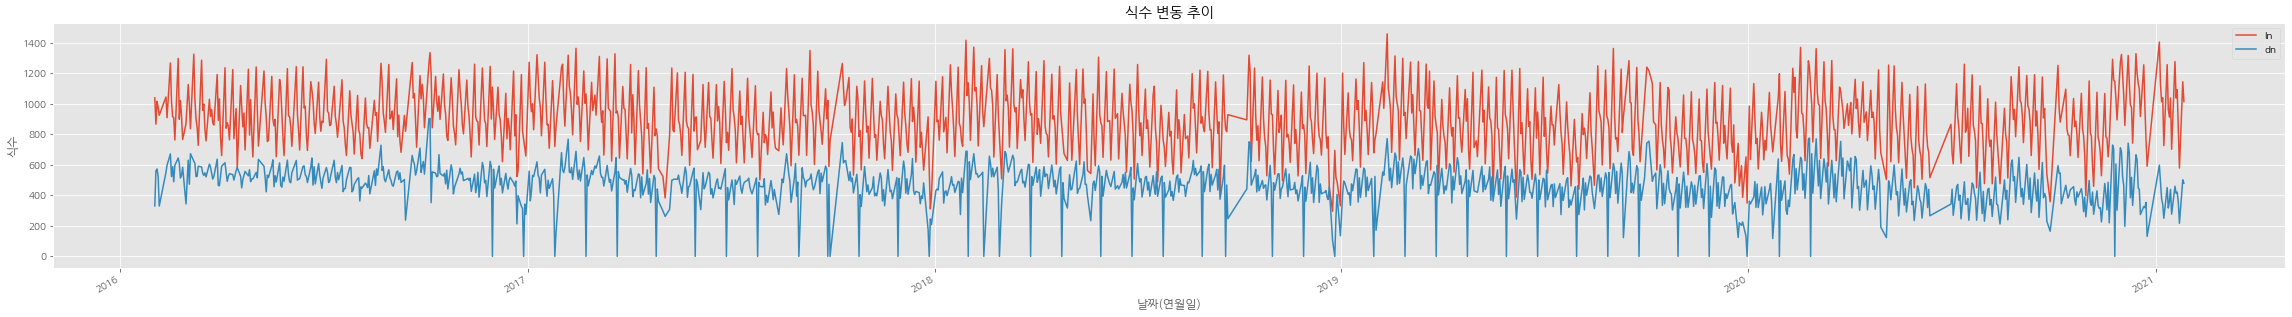

In [31]:
train.plot(x='ymd',y=['ln','dn'],figsize=(40,5))

plt.xlabel('날짜(연월일)')
plt.ylabel('식수')
plt.title('식수 변동 추이')

plt.show()

In [32]:
df_time = train[['ymd','ln','dn']].copy()

In [33]:
df_time['ym'] = df_time.ymd.dt.strftime('%y-%m')
tmp_time = df_time.groupby('ym',as_index=False).mean()

In [34]:
tmp_time['roll_mean10_ln'] = pd.Series.rolling(tmp_time['ln'], window=10, center = False).mean()
tmp_time['roll_mean10_dn'] = pd.Series.rolling(tmp_time['dn'], window=10, center = False).mean()

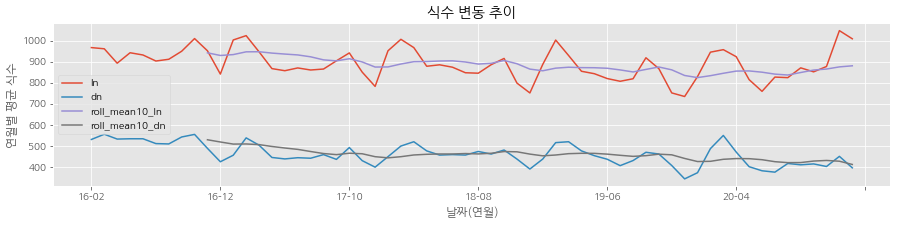

In [35]:
tmp_time.plot(x='ym',y=['ln','dn','roll_mean10_ln','roll_mean10_dn'],figsize=(15,3))

plt.xlabel('날짜(연월)')
plt.ylabel('연월별 평균 식수')
plt.title('식수 변동 추이')

plt.show()

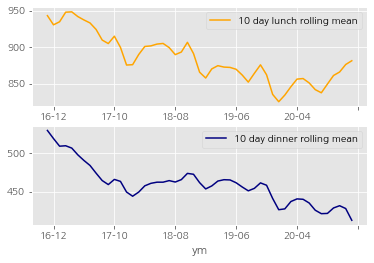

In [36]:
fig, axes = plt.subplots(2)
tmp_time.plot('ym','roll_mean10_ln', color='orange' , label='10 day lunch rolling mean',ax=axes[0])
tmp_time.plot('ym','roll_mean10_dn', color='navy' , label='10 day dinner rolling mean',ax=axes[1])
plt.show()

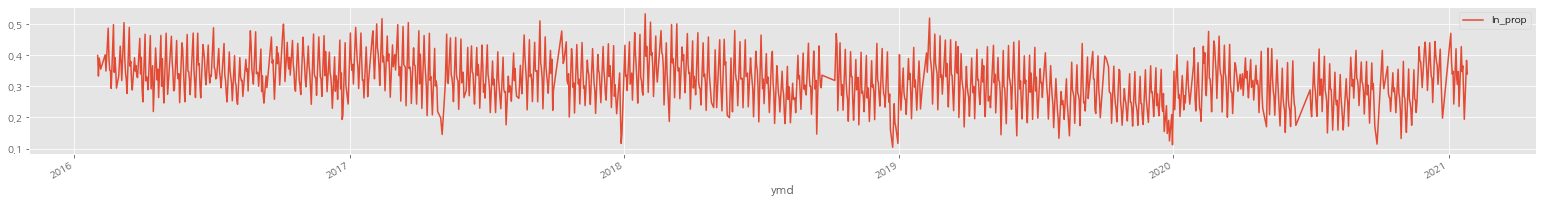

In [37]:
temp = train_ln[['ymd','employees','ln']].copy()
temp['ln_prop'] = temp.ln/temp.employees
temp.plot(x='ymd',y='ln_prop',figsize=(27,3))
plt.show()

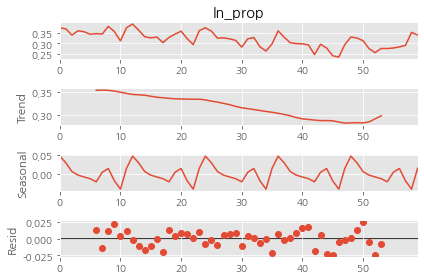

In [38]:
import statsmodels.api as sm

temp['ym'] = temp.ymd.dt.strftime('%y-%m')
temp2 = temp[['ym','ln_prop']]
temp2 = temp2.groupby('ym',as_index=False)[['ym','ln_prop']].mean()

seasonal_decompose_res = sm.tsa.seasonal_decompose(temp2.ln_prop,period=12)
seasonal_decompose_res.plot()
plt.show()

- 점심
  - 연초에 급증 후 서서히 감소
  - 연말 직전에 조금 증가
  - 연말에 급감
- 저녁
  - 전체적인 증감 추세는 점심과 비슷
  - 정기적으로(자기계발의 날)에 식수가 0이 됨
- 이동평균으로 봤을때 식수는 전체적으로 감소하는 추세로 보임

## 2.3 히트맵 (변수 간 상관관계)

In [39]:
import seaborn as sns

In [40]:
df_htm = train[['ln','dn','employees','dayoff','bustrip','overtime','remote']]

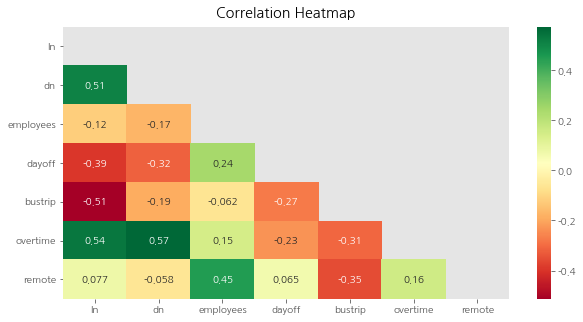

In [41]:
mask = np.zeros_like(df_htm.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,5))
sns.heatmap(df_htm.corr(),annot=True,mask=mask,cmap='RdYlGn')
plt.title('Correlation Heatmap', pad = 10)
plt.show()

- 점심
  - bustrip과 음의 상관관계
  - overtime과 양의 상관관계
- 저녁
  - overtime과 양의 상관관계

## 2.4 히트맵2 (월별, 요일별 상관관계)

In [42]:
df_htm2 = train[['ymd','dow', 'employees', 'dayoff', 'bustrip', 'overtime', 'remote', 'ln','dn']].copy()
df_htm2['month'] = df_htm2.ymd.dt.month

In [43]:
tmp_ln = df_htm2.groupby(['dow', 'month'])['ln'].mean().reset_index().pivot('dow', 'month', 'ln')
tmp_dn = df_htm2.groupby(['dow', 'month'])['dn'].mean().reset_index().pivot('dow', 'month', 'dn')

In [44]:
tmp_ln.head(5)

month,1,2,3,4,5,6,7,8,9,10,11,12
dow,,,,,,,,,,,,
0,1210.210526,1245.526316,1239.428571,1156.045455,1103.263158,1131.823529,1106.391304,1109.800000,1148.750000,1127.263158,1134.714286,1047.350000
1,994.500000,1006.055556,975.476190,863.476190,935.315789,925.470588,887.545455,893.523810,933.263158,964.157895,881.523810,859.300000
2,918.095238,1004.666667,974.428571,895.315789,924.285714,890.764706,839.090909,869.045455,930.944444,920.368421,855.954545,857.947368
3,856.095238,936.736842,910.500000,839.100000,781.619048,807.157895,765.952381,798.318182,822.777778,859.611111,764.545455,760.190476
4,679.333333,756.789474,683.136364,650.190476,608.000000,612.250000,629.227273,628.181818,684.105263,690.470588,614.545455,626.809524


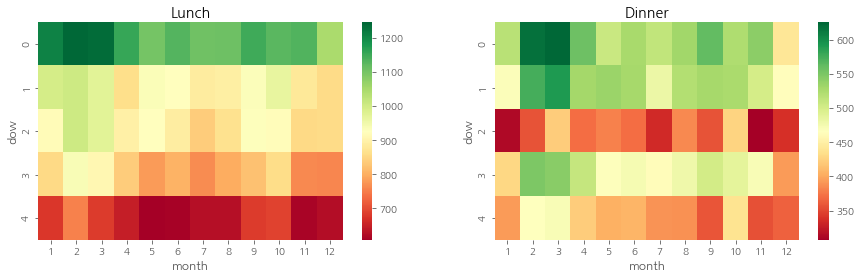

In [45]:
plt.figure(figsize=(15,4))
plt.subplot(121)
sns.heatmap(tmp_ln,cmap='RdYlGn')
plt.title('Lunch')

plt.subplot(122)
sns.heatmap(tmp_dn,cmap='RdYlGn')
plt.title('Dinner')

plt.show()

In [46]:
idx = train[train.dn == 0].index
tmp = train.drop(idx)
tmp['month'] = tmp.ymd.dt.month
tmp_dn2 = tmp.groupby(['month', 'dow'])['dn'].mean().reset_index().pivot('dow', 'month', 'dn')

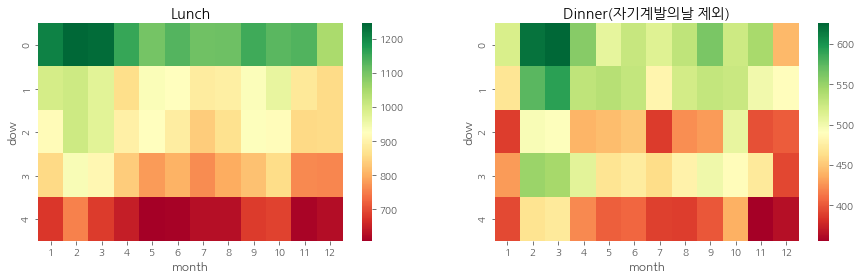

In [47]:
plt.figure(figsize=(15,4))
plt.subplot(121)
sns.heatmap(tmp_ln,cmap='RdYlGn')
plt.title('Lunch')

plt.subplot(122)
sns.heatmap(tmp_dn2,cmap='RdYlGn')
plt.title('Dinner(자기계발의날 제외)')

plt.show()

- 점심
  - 월요일에 전체적으로 식수가 많음
  - 금요일에 전체적으로 식수가 적음
  - 2,3월 월요일에 가장 많음
  - 5,6,11월 금요일에 가장 적음
  
- 저녁
  - 월요일에 전체적으로 식수가 많음
  - 수요일, 금요일에 전체적으로 식수가 적음
  - 2,3월 월요일에 가장 많음
  - 1,7월 수요일, 11,12월 금요일에 가장 적음

# 3. 추가적인 전처리

## 3.1 자기계발의날 제거

In [48]:
dn_idx = train_dn.loc[train_dn.rice.isnull()].index
train_dn = train_dn.drop(dn_idx)

## 3.2 출근자 칼럼 추가

In [49]:
train_ln['atoffice'] = train_ln.employees - (train_ln.dayoff + train_ln.bustrip + train_ln.remote)
train_dn['atoffice'] = train_dn.employees - (train_dn.dayoff + train_dn.bustrip + train_dn.remote)

test_ln['atoffice'] = test_ln.employees - (test_ln.dayoff + test_ln.bustrip + test_ln.remote)
test_dn['atoffice'] = test_dn.employees - (test_dn.dayoff + test_dn.bustrip + test_dn.remote)

## 3.3 행 수정 (삼계탕)

In [50]:
train_ln.loc[train_ln.rice=='삼계탕']

,ymd,dow,employees,dayoff,bustrip,overtime,remote,menu2,ln,rice,soup,side1,side2,side3,kimchi,etc,atoffice
356,2017-07-12,2,2839,69,263,0,0.0,"삼계탕 (닭:국내산) 찹쌀밥 (찹쌀,쌀:국내산) 생야채 수박 깍두기 (김치:...",918.0,삼계탕,찹쌀밥,생야채,수박,깍두기,깍두기,수박,2507.0
603,2018-07-17,1,2704,111,256,307,0.0,삼계탕 (쌀:국내산) 찹쌀밥 생야채 참나물생채 수박 석박지 (김치:국내산),1116.0,삼계탕,찹쌀밥,생야채,참나물생채,수박,석박지,수박,2337.0
840,2019-07-12,4,2760,244,306,0,0.0,"삼계탕 (닭:국내산) 찹쌀밥 (찹쌀,쌀:국내산) 생야채 수박 수제석박지 (고...",856.0,삼계탕,찹쌀밥,생야채,수박,수제석박지,수제석박지,수박,2210.0


In [51]:
train_ln.rice[356] = '찹쌀밥'; train_ln.soup[356] = '삼계탕'
train_ln.rice[603] = '찹쌀밥'; train_ln.soup[603] = '삼계탕'
train_ln.rice[840] = '찹쌀밥'; train_ln.soup[840] = '삼계탕'

<ipython-input-51-68bfa3f8d3da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ln.rice[356] = '찹쌀밥'; train_ln.soup[356] = '삼계탕'
<ipython-input-51-68bfa3f8d3da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ln.rice[603] = '찹쌀밥'; train_ln.soup[603] = '삼계탕'
<ipython-input-51-68bfa3f8d3da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ln.rice[840] = '찹쌀밥'; train_ln.soup[840] = '삼계탕'


In [52]:
train_ln.loc[train_ln.soup=='삼계탕']

,ymd,dow,employees,dayoff,bustrip,overtime,remote,menu2,ln,rice,soup,side1,side2,side3,kimchi,etc,atoffice
356,2017-07-12,2,2839,69,263,0,0.0,"삼계탕 (닭:국내산) 찹쌀밥 (찹쌀,쌀:국내산) 생야채 수박 깍두기 (김치:...",918.0,찹쌀밥,삼계탕,생야채,수박,깍두기,깍두기,수박,2507.0
603,2018-07-17,1,2704,111,256,307,0.0,삼계탕 (쌀:국내산) 찹쌀밥 생야채 참나물생채 수박 석박지 (김치:국내산),1116.0,찹쌀밥,삼계탕,생야채,참나물생채,수박,석박지,수박,2337.0
840,2019-07-12,4,2760,244,306,0,0.0,"삼계탕 (닭:국내산) 찹쌀밥 (찹쌀,쌀:국내산) 생야채 수박 수제석박지 (고...",856.0,찹쌀밥,삼계탕,생야채,수박,수제석박지,수제석박지,수박,2210.0
1146,2020-10-28,2,3008,105,287,3,138.0,쌀밥/흑미밥/찰현미밥 삼계탕 고기완자전 방풍나물 채소스틱 수제토마토청에이드 양상추샐러드,791.0,쌀밥/흑미밥/찰현미밥,삼계탕,고기완자전,방풍나물,채소스틱,수제토마토청에이드,양상추샐러드,2478.0


## 3.4 데이터 내보내기

In [82]:
train_ln.head(5)

,ymd,dow,employees,dayoff,bustrip,overtime,remote,menu2,ln,rice,soup,side1,side2,side3,kimchi,etc,atoffice
0,2016-02-01,0,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...",1039.0,쌀밥/잡곡밥,오징어찌개,쇠불고기,계란찜,청포묵무침,포기김치,요구르트,2401.0
1,2016-02-02,1,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...",867.0,쌀밥/잡곡밥,김치찌개,가자미튀김,모둠소세지구이,마늘쫑무침,배추겉절이,요구르트,2378.0
2,2016-02-03,2,2601,56,180,111,0.0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...",1017.0,카레덮밥,팽이장국,치킨핑거,쫄면야채무침,견과류조림,포기김치,요구르트,2365.0
3,2016-02-04,3,2601,104,220,355,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...",978.0,쌀밥/잡곡밥,쇠고기무국,주꾸미볶음,부추전,시금치나물,포기김치,요구르트,2277.0
4,2016-02-05,4,2601,278,181,34,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...",925.0,쌀밥/잡곡밥,떡국,돈육씨앗강정,우엉잡채,청경채무침,포기김치,요구르트,2142.0


In [83]:
train_ln.to_csv('./data/train_ln.csv',index = False, encoding = 'utf-8-sig')
train_dn.to_csv('./data/train_dn.csv',index = False, encoding = 'utf-8-sig')
test_ln.to_csv('./data/test_ln.csv',index = False, encoding = 'utf-8-sig')
test_dn.to_csv('./data/test_dn.csv',index = False, encoding = 'utf-8-sig')